In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../OUT/total_20.csv")

In [82]:
(df[df.isnull().any(axis=1)]["result"]==0).sum()

11

In [85]:
df.isnull().sum()[-15:]

sa2_box_row       0
sa2_box_dan       0
socv2_ocv        24
sa3_box_col      24
sa3_box_row      24
sa3_box_dan      24
socv3_ocv        24
ocv2_deltaocv    24
ocv1_deltaocv    24
m1_thick         74
m1_voltage       74
m1_res_ac        74
m1_mv            74
m1_voltage_an    74
result            0
dtype: int64

In [3]:
df.head()

,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,result
0,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3759.6,5.0,6.8,4709.0,37583.0,92.0,626.0,109.0,0
1,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3760.4,5.1,6.8,4712.0,37591.0,92.0,606.0,5.0,0
2,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3760.4,4.9,6.7,4737.0,37594.0,92.0,566.0,-10.0,0
3,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3759.0,5.1,6.9,4709.0,37578.0,92.0,606.0,111.0,0
4,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3759.0,5.0,6.7,4706.0,37577.0,93.0,606.0,-38.0,0


In [6]:
df[["result", "m1_voltage_an", "m1_mv"]]

,result,m1_voltage_an,m1_mv
0,0,109.0,626.0
1,0,5.0,606.0
2,0,-10.0,566.0
3,0,111.0,606.0
4,0,-38.0,606.0
...,...,...,...
31025,0,-35.0,643.0
31026,0,89.0,620.0
31027,0,-23.0,597.0
31028,0,3.0,620.0


In [23]:
filtered_columns = df.filter(like="pg")

# 새로운 데이터프레임으로 변환
df1 = df[filtered_columns.columns]
df1["judge"] = df["judge"]
df1.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10924\1034269005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["judge"] = df["judge"]


,pg1_tat,pg1_impfit,pg1_imp,pg1_voltage_start,pg1_curr_end,pg1_box_col,pg1_box_dan,pg1_temp_avg,judge
0,291,2284,2136,3759,119,01열,01단,275,양품
1,291,2273,2125,3760,120,01열,01단,275,양품
2,291,2238,2090,3760,120,01열,01단,275,양품
3,291,2274,2126,3759,119,01열,01단,275,양품
4,291,2248,2100,3758,120,01열,01단,275,양품


In [29]:
for i in df1.columns[:-1]:
    print(i)
    print(df1.groupby("judge")[i].describe())
    print("")

pg1_tat
         count        mean        std    min    25%    50%    75%    max
judge                                                                   
불량      1024.0  289.751953  17.343773  269.0  290.0  290.0  290.0  836.0
양품     30006.0  289.047257  15.757121  258.0  290.0  290.0  290.0  836.0

pg1_impfit
         count         mean        std     min     25%     50%     75%     max
judge                                                                         
불량      1024.0  2264.704102  35.236408  2155.0  2241.0  2265.0  2289.0  2387.0
양품     30006.0  2254.728554  31.789017  2131.0  2234.0  2254.0  2275.0  2420.0

pg1_imp
         count         mean        std     min     25%     50%      75%  \
judge                                                                     
불량      1024.0  2177.541016  50.846253  2039.0  2139.0  2180.0  2215.25   
양품     30006.0  2147.615644  44.664577  2003.0  2116.0  2146.0  2178.00   

          max  
judge          
불량     2314.0  
양품     2322.0 

In [27]:
df1.columns[:-1]

Index(['pg1_tat', 'pg1_impfit', 'pg1_imp', 'pg1_voltage_start', 'pg1_curr_end',
       'pg1_box_col', 'pg1_box_dan', 'pg1_temp_avg'],
      dtype='object')

In [34]:
df[["ocv1_tat", "ocv1_ocv"]].corr()

,ocv1_tat,ocv1_ocv
ocv1_tat,1.000000,0.050508
ocv1_ocv,0.050508,1.000000


In [35]:
df[["ocv1_ocv", "judge"]]

,ocv1_ocv,judge
0,3337,양품
1,3333,양품
2,3354,양품
3,3336,양품
4,3338,양품
...,...,...
31025,3320,양품
31026,3322,양품
31027,3329,양품
31028,3325,양품


In [36]:
df[["ocv1_ocv", "judge"]].groupby("judge").describe()

ocv1_ocv                                                               
         count         mean       std     min     25%     50%     75%     max
judge                                                                        
불량      1024.0  3333.910156  6.189081  3316.0  3329.0  3333.0  3338.0  3355.0
양품     30006.0  3335.145271  7.692524  3269.0  3330.0  3334.0  3339.0  3389.0

In [39]:
df[["ocv1_ocv", "ocv2_ocv", "socv1_ocv", "socv2_ocv", "socv3_ocv", "ocv2_deltaocv" ,"ocv1_deltaocv","judge"]]

,ocv1_ocv,ocv2_ocv,socv1_ocv,socv2_ocv,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,judge
0,3337,3764,3766.4,3761.4,3759.6,5.0,6.8,양품
1,3333,3765,3767.2,3762.1,3760.4,5.1,6.8,양품
2,3354,3765,3767.1,3762.2,3760.4,4.9,6.7,양품
3,3336,3763,3765.9,3760.8,3759.0,5.1,6.9,양품
4,3338,3763,3765.7,3760.7,3759.0,5.0,6.7,양품
...,...,...,...,...,...,...,...,...
31025,3320,3762,3766.4,3761.1,3759.2,5.3,7.2,양품
31026,3322,3762,3766.3,3761.0,3759.2,5.3,7.1,양품
31027,3329,3764,3767.3,3762.1,3760.3,5.2,7.0,양품
31028,3325,3764,3767.0,3761.7,3760.0,5.3,7.0,양품


In [42]:
df[["ocv1_ocv", "ocv2_ocv", "socv1_ocv", "socv2_ocv", "socv3_ocv", "ocv2_deltaocv" ,"ocv1_deltaocv"]].corr()

,ocv1_ocv,ocv2_ocv,socv1_ocv,socv2_ocv,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv
ocv1_ocv,1.000000,0.044868,0.075242,0.107135,0.113598,-0.173285,-0.164373
ocv2_ocv,0.044868,1.000000,0.729732,0.723908,0.717460,0.145716,0.153729
socv1_ocv,0.075242,0.729732,1.000000,0.985825,0.976933,0.235016,0.238654
socv2_ocv,0.107135,0.723908,0.985825,1.000000,0.995180,0.068608,0.089320
socv3_ocv,0.113598,0.717460,0.976933,0.995180,1.000000,0.043655,0.025771
ocv2_deltaocv,-0.173285,0.145716,0.235016,0.068608,0.043655,1.000000,0.901644
ocv1_deltaocv,-0.164373,0.153729,0.238654,0.089320,0.025771,0.901644,1.000000


In [43]:
c = df[["ocv1_ocv", "ocv2_ocv", "socv1_ocv", "socv2_ocv", "socv3_ocv", "ocv2_deltaocv" ,"ocv1_deltaocv","judge"]]

In [47]:
c[c["judge"] == "양품"][["ocv1_ocv", "ocv2_ocv", "socv1_ocv", "socv2_ocv", "socv3_ocv", "ocv2_deltaocv" ,"ocv1_deltaocv"]].corr()

,ocv1_ocv,ocv2_ocv,socv1_ocv,socv2_ocv,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv
ocv1_ocv,1.000000,0.046755,0.077852,0.110044,0.115985,-0.178956,-0.165617
ocv2_ocv,0.046755,1.000000,0.730082,0.724404,0.718066,0.150362,0.156536
socv1_ocv,0.077852,0.730082,1.000000,0.986597,0.977771,0.239718,0.241344
socv2_ocv,0.110044,0.724404,0.986597,1.000000,0.995558,0.078086,0.095130
socv3_ocv,0.115985,0.718066,0.977771,0.995558,1.000000,0.050591,0.032501
ocv2_deltaocv,-0.178956,0.150362,0.239718,0.078086,0.050591,1.000000,0.908523
ocv1_deltaocv,-0.165617,0.156536,0.241344,0.095130,0.032501,0.908523,1.000000


In [48]:
c[c["judge"] == "불량"][["ocv1_ocv", "ocv2_ocv", "socv1_ocv", "socv2_ocv", "socv3_ocv", "ocv2_deltaocv" ,"ocv1_deltaocv"]].corr()

,ocv1_ocv,ocv2_ocv,socv1_ocv,socv2_ocv,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv
ocv1_ocv,1.000000,0.011455,0.021105,0.032381,0.057987,-0.052898,-0.128582
ocv2_ocv,0.011455,1.000000,0.708196,0.702304,0.692437,0.042782,0.074669
socv1_ocv,0.021105,0.708196,1.000000,0.962935,0.951907,0.146308,0.171368
socv2_ocv,0.032381,0.702304,0.962935,1.000000,0.983632,-0.125947,-0.050453
socv3_ocv,0.057987,0.692437,0.951907,0.983632,1.000000,-0.106478,-0.138730
ocv2_deltaocv,-0.052898,0.042782,0.146308,-0.125947,-0.106478,1.000000,0.815292
ocv1_deltaocv,-0.128582,0.074669,0.171368,-0.050453,-0.138730,0.815292,1.000000


In [53]:
b = df[["c1_curr_end", "c1_voltage_avg", "c1_capa", "c1_ccval", "c1_time_cc", "c1_box_col", "c1_box_dan",
    "c1_temp_avg", "result"]]
b.head()

,c1_curr_end,c1_voltage_avg,c1_capa,c1_ccval,c1_time_cc,c1_box_col,c1_box_dan,c1_temp_avg,result
0,6798,3781,6477,6477,3432,06열,09단,291,0
1,6798,3781,6481,6481,3434,06열,09단,291,0
2,6801,3783,6446,6446,3414,06열,09단,291,0
3,6798,3781,6460,6460,3423,06열,09단,291,0
4,6798,3781,6472,6472,3429,06열,09단,291,0


In [54]:
cols = b.columns[:5]
for i in cols:
    sns.scatterplot(i, "c1_temp_avg", data = b)

TypeError: scatterplot() got multiple values for argument 'data'

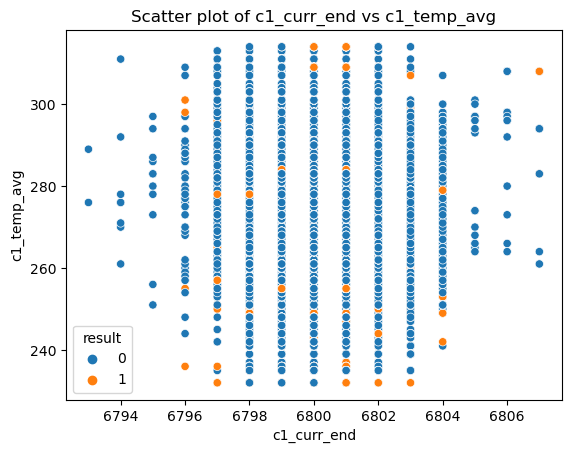

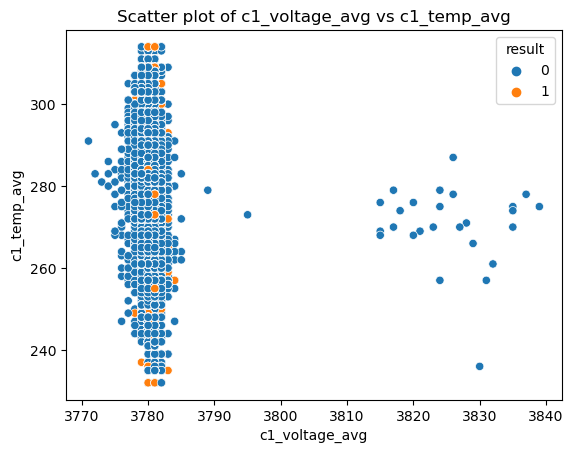

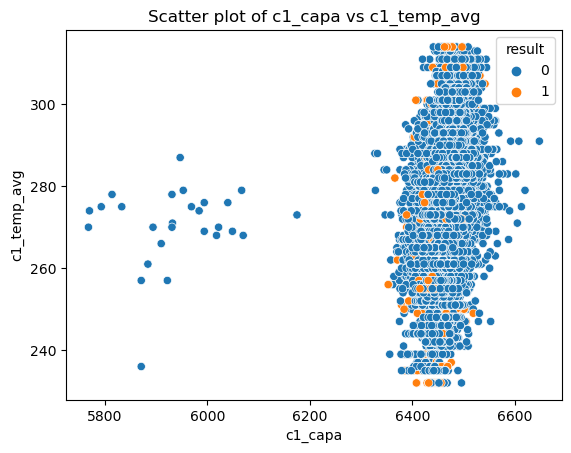

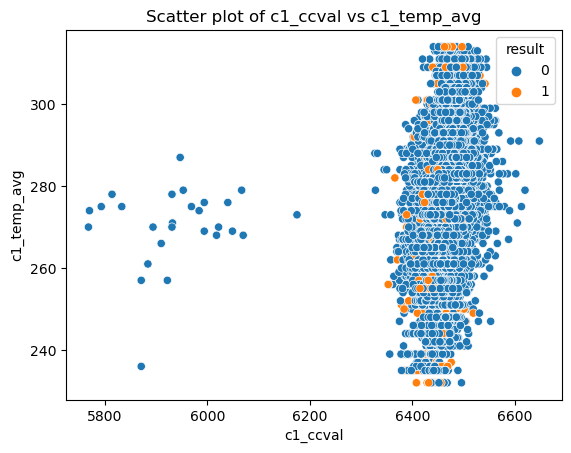

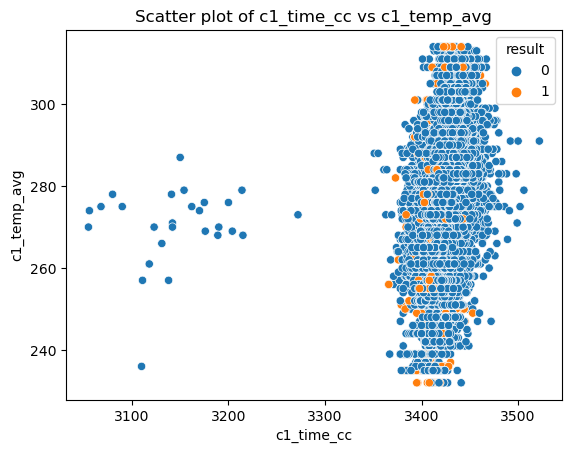

In [56]:
# 각 열에 대해 산점도 생성
for i in cols:
    plt.figure()  # 새로운 Figure 생성
    sns.scatterplot(x=i, y="c1_temp_avg", data=b, hue = "result")
    plt.title(f'Scatter plot of {i} vs c1_temp_avg')
    plt.show()

In [57]:
c = df[["c2_curr_end", "c2_voltage_avg", "c2_capa", "c2_ccval", "c2_time_cc", "c2_box_col", "c2_box_dan",
    "c2_temp_avg", "result"]]
c.head()

,c2_curr_end,c2_voltage_avg,c2_capa,c2_ccval,c2_time_cc,c2_box_col,c2_box_dan,c2_temp_avg,result
0,6800,4146,623,623,332,06열,09단,290,0
1,6802,4146,632,632,336,06열,09단,290,0
2,6801,4147,619,619,329,06열,09단,290,0
3,6802,4146,633,633,337,06열,09단,290,0
4,6802,4146,630,630,335,06열,09단,290,0


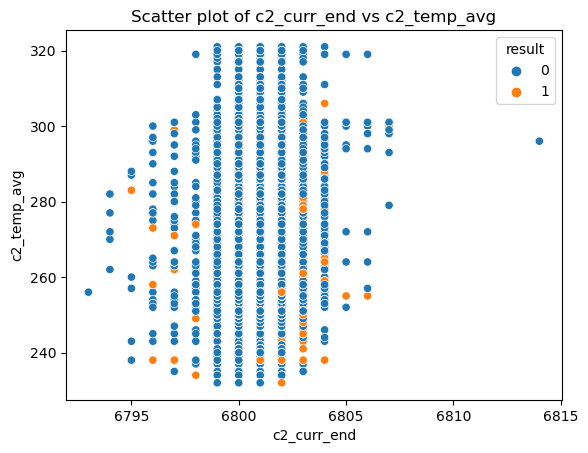

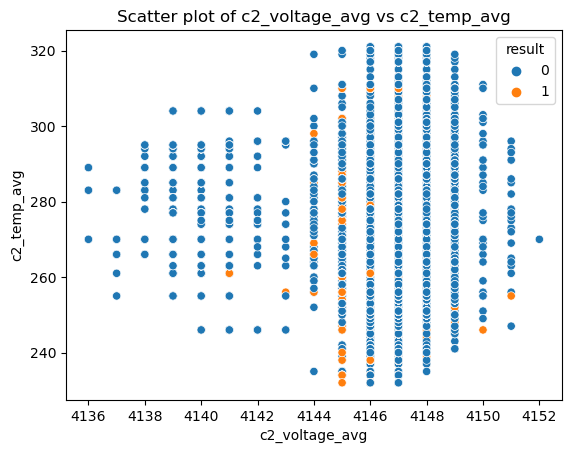

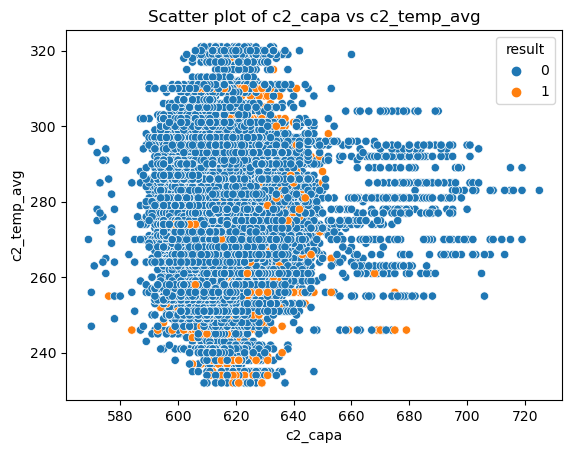

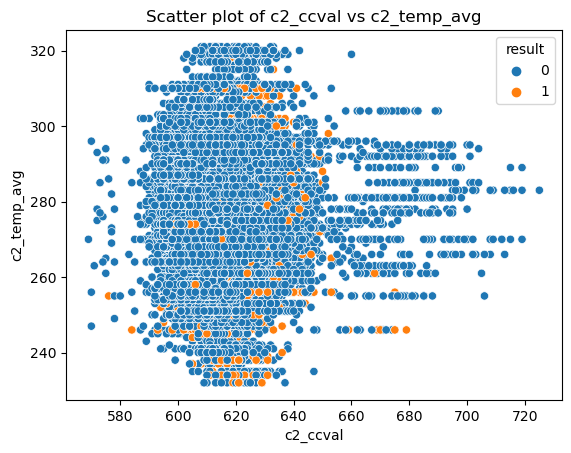

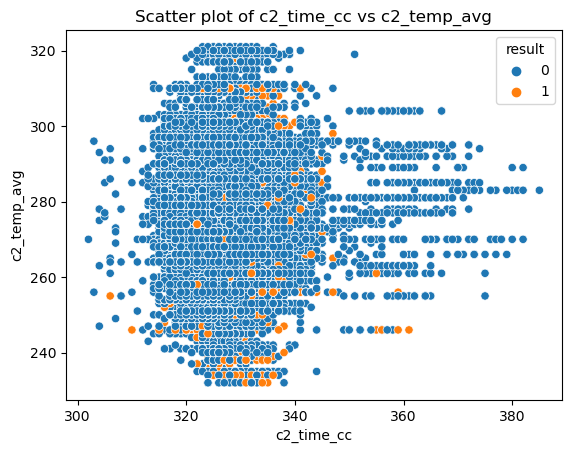

In [59]:
# 각 열에 대해 산점도 생성
cols = c.columns[:5]
for i in cols:
    plt.figure()  # 새로운 Figure 생성
    sns.scatterplot(x=i, y="c2_temp_avg", data=c, hue = "result")
    plt.title(f'Scatter plot of {i} vs c2_temp_avg')
    plt.show()

In [60]:
d = df[["c3_curr_end", "c3_voltage_avg", "c3_capa", "c3_ccval", "c3_time_cc", "c3_box_col", "c3_box_dan",
    "c3_temp_avg", "result"]]
d.head()

,c3_curr_end,c3_voltage_avg,c3_capa,c3_ccval,c3_time_cc,c3_box_col,c3_box_dan,c3_temp_avg,result
0,136,4189,737,577,307,06열,09단,286,0
1,136,4190,751,582,310,06열,09단,286,0
2,136,4188,730,577,307,06열,09단,286,0
3,135,4189,746,583,310,06열,09단,286,0
4,136,4189,736,577,307,06열,09단,286,0


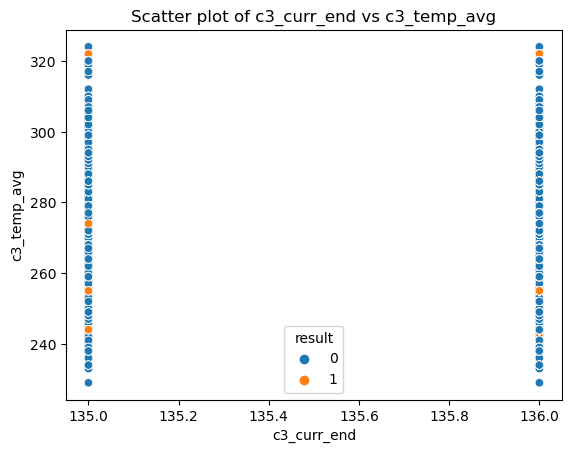

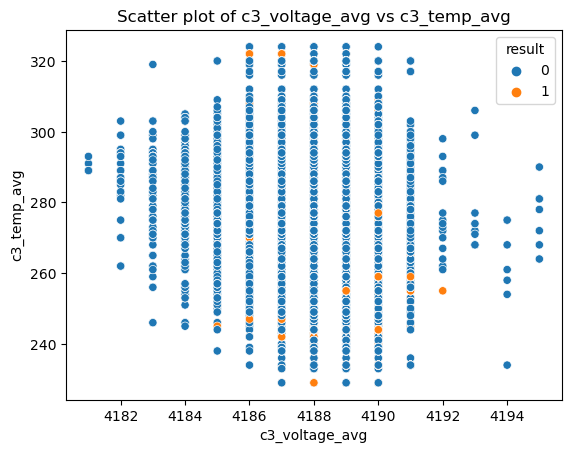

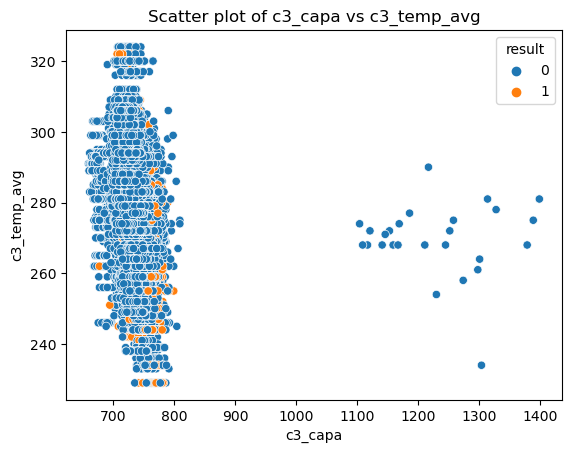

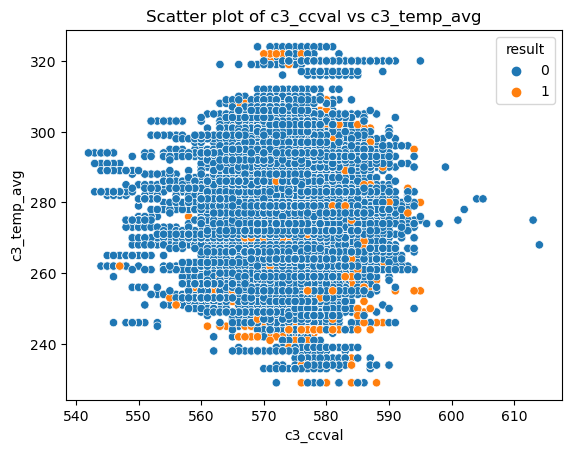

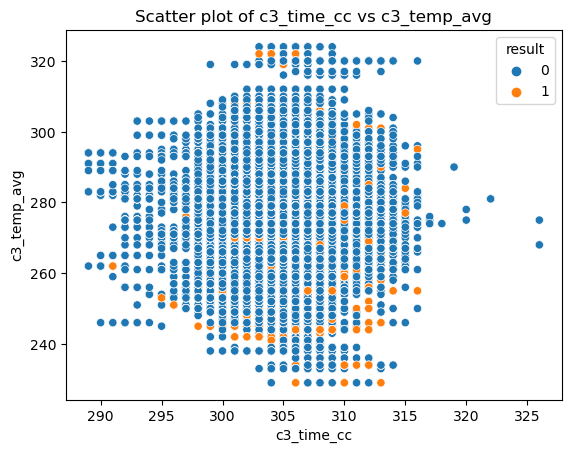

In [61]:
# 각 열에 대해 산점도 생성
cols = d.columns[:5]
for i in cols:
    plt.figure()  # 새로운 Figure 생성
    sns.scatterplot(x=i, y="c3_temp_avg", data=d, hue = "result")
    plt.title(f'Scatter plot of {i} vs c3_temp_avg')
    plt.show()

In [62]:
e = df[["c4_curr_end", "c4_voltage_avg", "c4_capa", "c4_ccval", "c4_time_cc", "c4_box_col", "c4_box_dan",
    "c4_temp_avg", "result"]]
e.head()

,c4_curr_end,c4_voltage_avg,c4_capa,c4_ccval,c4_time_cc,c4_box_col,c4_box_dan,c4_temp_avg,result
0,135,3624,4299,4102,2174,06열,09단,296,0
1,136,3629,4312,4108,2177,06열,09단,296,0
2,135,3630,4299,4093,2168,06열,09단,296,0
3,136,3620,4293,4100,2173,06열,09단,296,0
4,135,3619,4298,4106,2176,06열,09단,296,0


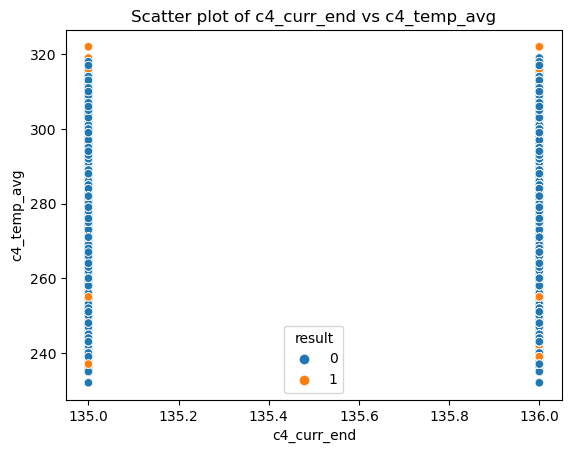

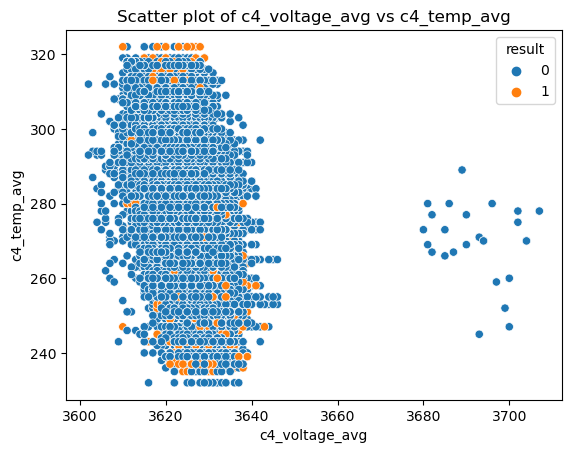

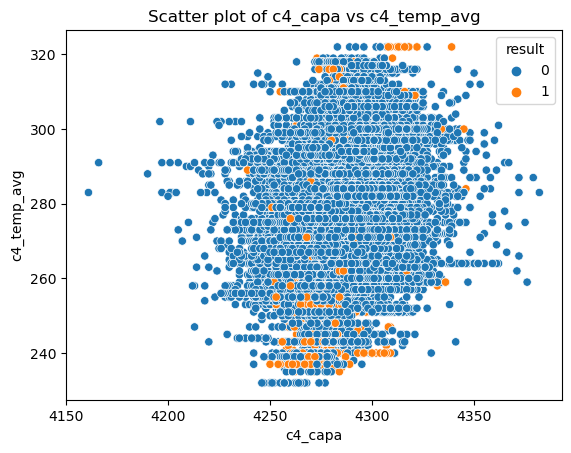

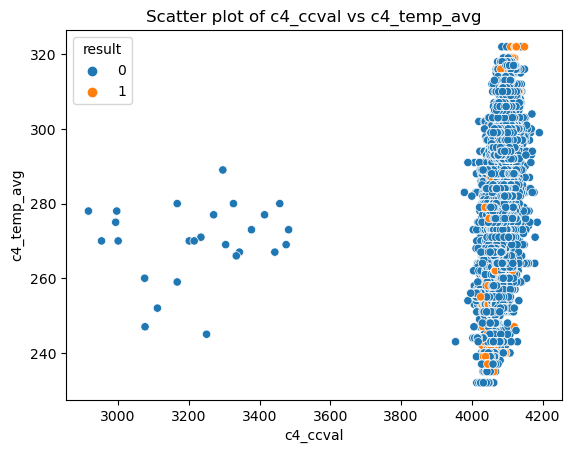

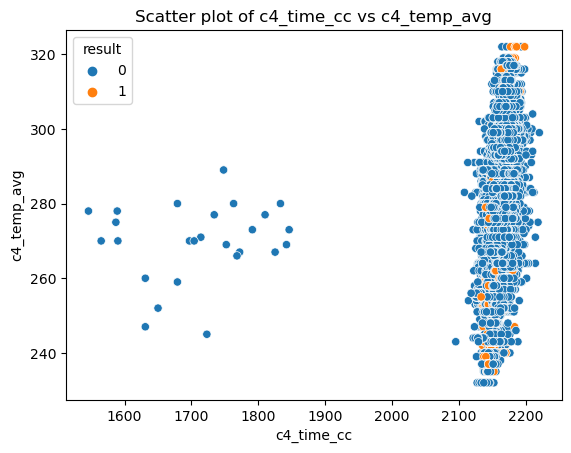

In [63]:
# 각 열에 대해 산점도 생성
cols = e.columns[:5]
for i in cols:
    plt.figure()  # 새로운 Figure 생성
    sns.scatterplot(x=i, y="c4_temp_avg", data=e, hue = "result")
    plt.title(f'Scatter plot of {i} vs c4_temp_avg')
    plt.show()

In [65]:
f = df[["dc1_curr_end", "dc1_voltage_avg", "dc1_capa", "dc1_capafit", "dc1_box_col", "dc1_box_dan", "dc1_temp_avg",
     "result"]]
f.head()

,dc1_curr_end,dc1_voltage_avg,dc1_capa,dc1_capafit,dc1_box_col,dc1_box_dan,dc1_temp_avg,result
0,6799,4110,545,533,06열,09단,291,0
1,6799,4109,545,533,06열,09단,291,0
2,6799,4110,544,532,06열,09단,291,0
3,6800,4109,545,533,06열,09단,291,0
4,6799,4110,545,533,06열,09단,291,0


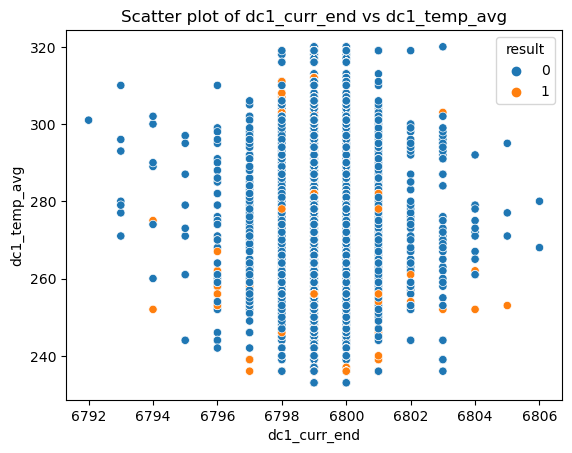

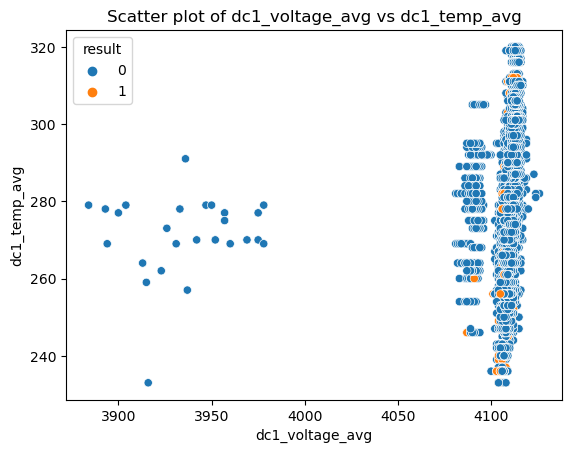

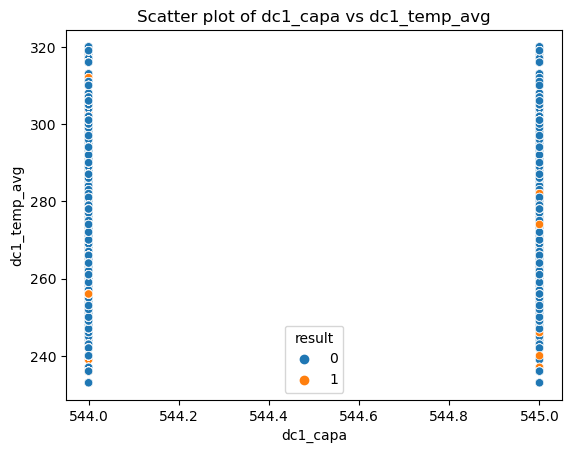

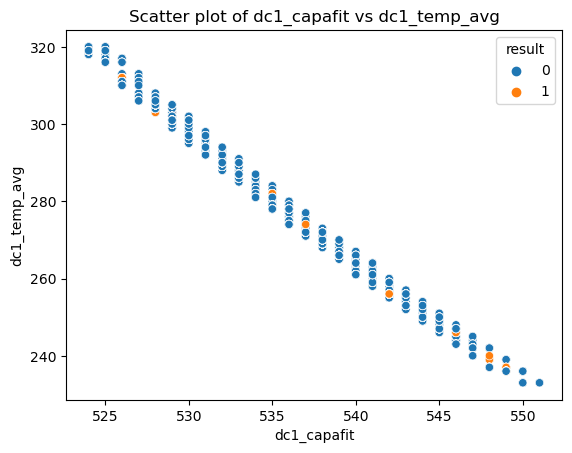

In [66]:
# 각 열에 대해 산점도 생성
cols = f.columns[:4]
for i in cols:
    plt.figure()  # 새로운 Figure 생성
    sns.scatterplot(x=i, y="dc1_temp_avg", data=f, hue = "result")
    plt.title(f'Scatter plot of {i} vs dc1_temp_avg')
    plt.show()

In [67]:
g = df[["dc2_curr_end", "dc2_voltage_avg", "dc2_capa", "dc2_capafit", "dc2_box_col", "dc2_box_dan", "dc2_temp_avg",
     "result"]]
g.head()

,dc2_curr_end,dc2_voltage_avg,dc2_capa,dc2_capafit,dc2_box_col,dc2_box_dan,dc2_temp_avg,result
0,6799,4114,544,532,06열,09단,290,0
1,6799,4114,544,532,06열,09단,290,0
2,6799,4114,544,532,06열,09단,290,0
3,6799,4114,545,533,06열,09단,290,0
4,6799,4115,545,533,06열,09단,290,0


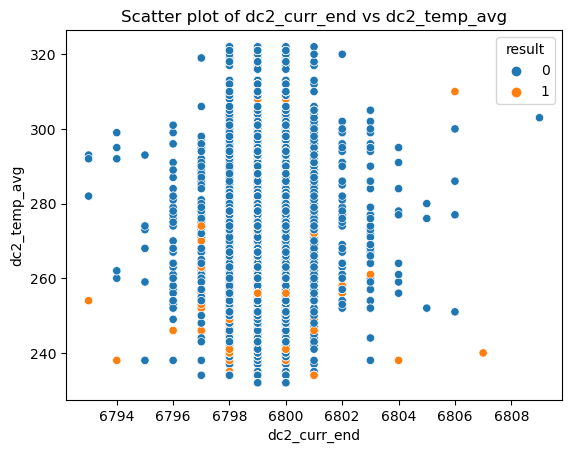

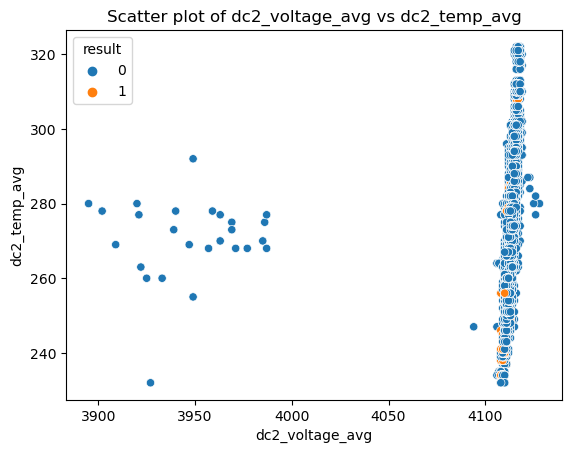

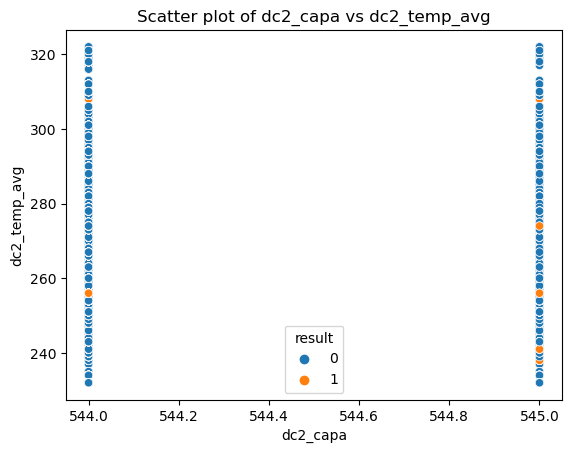

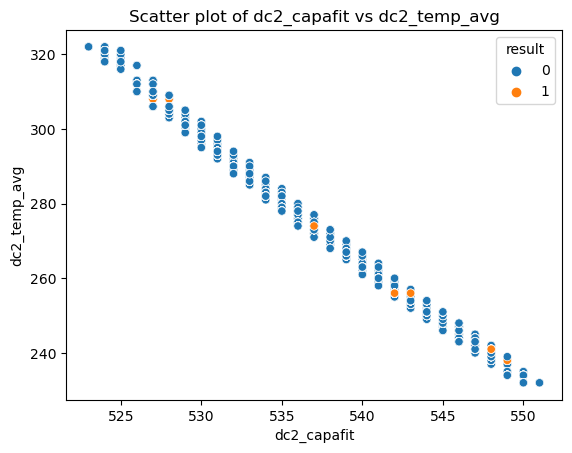

In [68]:
# 각 열에 대해 산점도 생성
cols = g.columns[:4]
for i in cols:
    plt.figure()  # 새로운 Figure 생성
    sns.scatterplot(x=i, y="dc2_temp_avg", data=g, hue = "result")
    plt.title(f'Scatter plot of {i} vs dc2_temp_avg')
    plt.show()

In [74]:
c = df[["ocv1_ocv", "c1_voltage_avg", "c1_ccval", "dc1_voltage_avg", "c2_voltage_avg", "c2_ccval", "dc2_voltage_avg", "c3_voltage_avg",
        "c3_ccval", "c3_cvval", "dc3_voltage_avg", "c4_voltage_avg", "c4_ccval", "c4_cvval", "ocv2_ocv", "socv1_ocv", "socv2_ocv", "socv3_ocv", 
        "ocv2_deltaocv" ,"ocv1_deltaocv","m1_voltage_an", "judge"]]

In [75]:
c

,ocv1_ocv,c1_voltage_avg,c1_ccval,dc1_voltage_avg,c2_voltage_avg,c2_ccval,dc2_voltage_avg,c3_voltage_avg,c3_ccval,c3_cvval,...,c4_ccval,c4_cvval,ocv2_ocv,socv1_ocv,socv2_ocv,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_voltage_an,judge
0,3337,3781,6477,4110,4146,623,4114,4189,577,159,...,4102,198,3764,3766.4,3761.4,3759.6,5.0,6.8,109.0,양품
1,3333,3781,6481,4109,4146,632,4114,4190,582,168,...,4108,204,3765,3767.2,3762.1,3760.4,5.1,6.8,5.0,양품
2,3354,3783,6446,4110,4147,619,4114,4188,577,153,...,4093,206,3765,3767.1,3762.2,3760.4,4.9,6.7,-10.0,양품
3,3336,3781,6460,4109,4146,633,4114,4189,583,163,...,4100,193,3763,3765.9,3760.8,3759.0,5.1,6.9,111.0,양품
4,3338,3781,6472,4110,4146,630,4115,4189,577,158,...,4106,192,3763,3765.7,3760.7,3759.0,5.0,6.7,-38.0,양품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31025,3320,3779,6454,4109,4147,614,4112,4189,575,168,...,4063,202,3762,3766.4,3761.1,3759.2,5.3,7.2,-35.0,양품
31026,3322,3779,6479,4110,4148,606,4113,4187,570,157,...,4077,199,3762,3766.3,3761.0,3759.2,5.3,7.1,89.0,양품
31027,3329,3781,6421,4107,4146,624,4111,4190,578,187,...,4050,222,3764,3767.3,3762.1,3760.3,5.2,7.0,-23.0,양품
31028,3325,3780,6439,4107,4147,618,4111,4188,574,168,...,4042,219,3764,3767.0,3761.7,3760.0,5.3,7.0,3.0,양품


In [76]:
c[["c3_ccval", "c3_cvval", "judge"]]

,c3_ccval,c3_cvval,judge
0,577,159,양품
1,582,168,양품
2,577,153,양품
3,583,163,양품
4,577,158,양품
...,...,...,...
31025,575,168,양품
31026,570,157,양품
31027,578,187,양품
31028,574,168,양품


C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

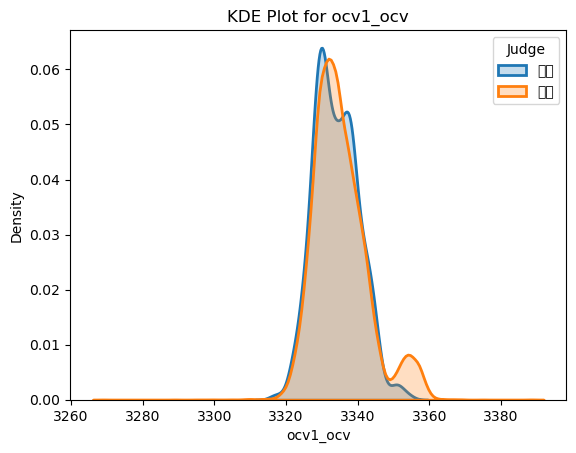

C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

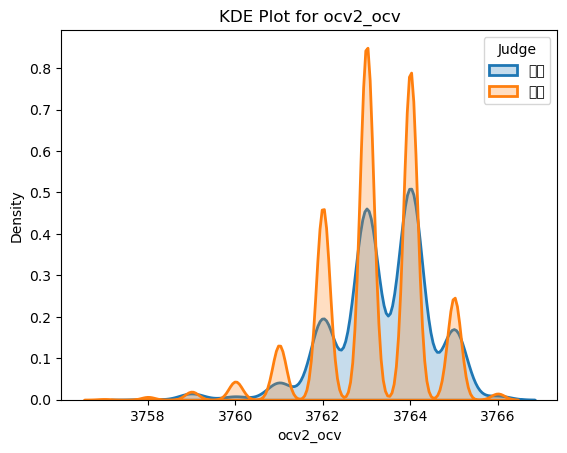

C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

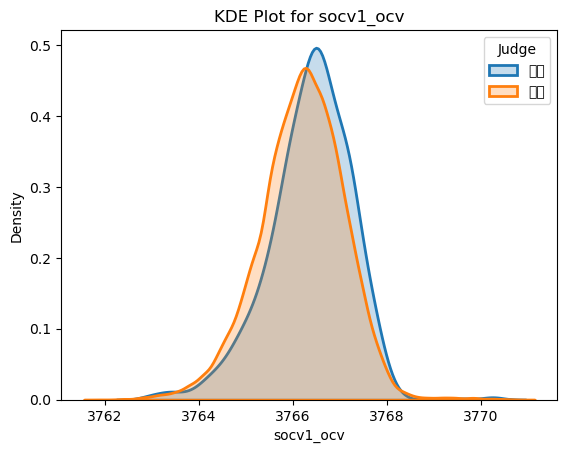

C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

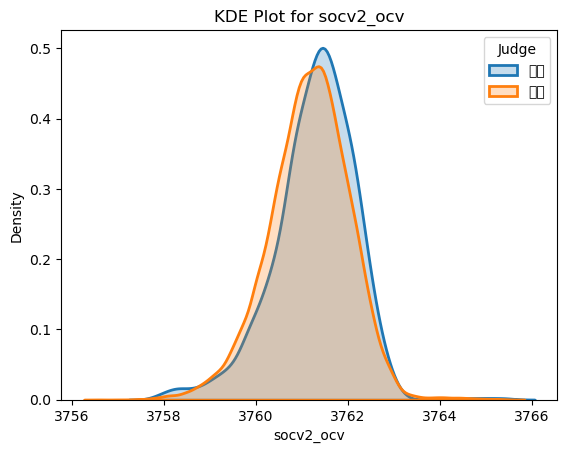

C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

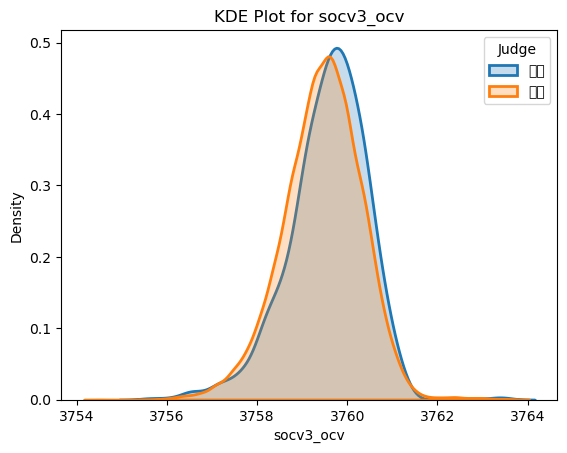

C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

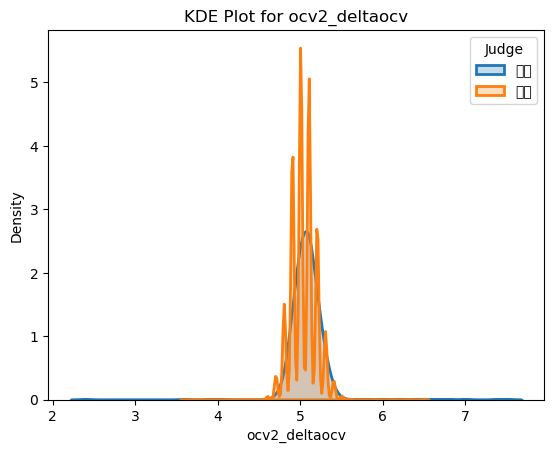

C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_10924\4182331507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

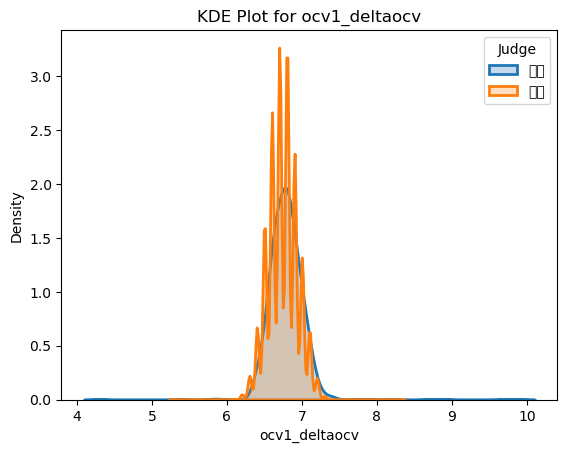

In [72]:
for i in c.columns[:-1]:
    plt.figure()  # 새로운 그래프 창 열기
    for judge, data in df.groupby('judge'):
        sns.kdeplot(data[i], label=judge, shade=True, linewidth=2)
    plt.title(f"KDE Plot for {i}")  # 그래프 제목 설정
    plt.xlabel(i)  # x축 레이블 설정
    plt.ylabel('Density')  # y축 레이블 설정
    plt.legend(title='Judge')  # 범례 표시
    plt.show()

In [73]:
import warnings
warnings.filterwarnings("ignore")